In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leesa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load data
Two CSVs and one API

In [2]:
# read CSV file 1 which has villager popularity ratings
popularity = pd.read_csv('data/acnh_villager_data.csv')

# display first 5 rows of popularity data to examine
popularity.head()

,tier,rank,name
0,1,1,Raymond
1,1,2,Marshal
2,1,3,Shino
3,1,4,Sherb
4,1,5,Sasha


In [3]:
# read CSV file 2 with paradise planning data for each villager
paradise = pd.read_csv('data/Paradise Planning.csv')

# display first 5 rows to examine data
paradise.head()

,Name,Filename,Request,Thought bubble,Song,Furniture List,Furniture Name List,Unique Entry ID
0,Ace,brd09,The Fishin' Hole,I want a place where I can fish to my heart's ...,To the Edge,3064;13637;13347,cooler box;outdoor folding chair;yacht,yrzvoz4kNmqN8N2pX
1,Admiral,brd06,Cool Country Cabin,I want a cool cabin where I can relax on hot d...,K.K. Rally,2736;2326;5979,retro fan;water pump;bamboo noodle slide,2dKeMSMjBLekssvwo
2,Agent S,squ05,Training Grounds for a Hero,"Heroes train! It's what they do, even on vacat...",Go K.K. Rider,7653;4015;4078,speed bag;shower booth;barbell,EN7dGxBHogyTYD4pS
3,Agnes,pig17,The Artsiest Art Museum,I want a place that's like a museum with artsy...,K.K. Fugue,1712;13255;13302,poster stand;elaborate display case;decorative...,pmmgTrYA9hvoj2v9b
4,Al,gor08,Gymnastics School for Kids,My dream is to someday teach gymnastics to kids.,K.K. Étude,12701;13188;7845,school locker;ball catcher;pull-up-bar stand,XKm6cmQjf4eFAHMRT


In [4]:
# retrieve villagers data from the API
response = requests.get('https://acnhapi.com/v1/villagers')

In [5]:
# convert villagers data into JSON format
data = response.json()

# print the keys to understand structure
print(data.keys())

dict_keys(['ant00', 'ant01', 'ant02', 'ant03', 'ant06', 'ant08', 'ant09', 'bea00', 'bea01', 'bea02', 'bea03', 'bea05', 'bea06', 'bea07', 'bea08', 'bea09', 'bea10', 'bea11', 'bea12', 'bea13', 'bea14', 'bea15', 'brd00', 'brd01', 'brd02', 'brd03', 'brd04', 'brd05', 'brd06', 'brd08', 'brd11', 'brd15', 'brd16', 'brd17', 'brd18', 'bul00', 'bul01', 'bul03', 'bul05', 'bul07', 'bul08', 'cat00', 'cat01', 'cat02', 'cat03', 'cat04', 'cat05', 'cat06', 'cat07', 'cat08', 'cat09', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat23', 'cbr00', 'cbr01', 'cbr02', 'cbr03', 'cbr04', 'cbr05', 'cbr06', 'cbr07', 'cbr09', 'cbr10', 'cbr13', 'cbr14', 'cbr15', 'cbr16', 'cbr17', 'cbr19', 'chn00', 'chn01', 'chn02', 'chn05', 'chn09', 'chn10', 'chn11', 'chn12', 'chn13', 'cow00', 'cow01', 'cow06', 'cow07', 'crd00', 'crd01', 'crd02', 'crd04', 'crd06', 'crd07', 'crd08', 'der00', 'der01', 'der02', 'der03', 'der04', 'der05', 'der06', 'der07', 'der08', 'der09',

In [6]:
# initialize empty list to store villager data
data_list = []

# loop through each key
for key in data.keys():
    # get the data for each villager using key
    villager_data = data[key]
    
    # convert the data for the villager into a dataframe
    villager_df = pd.json_normalize(villager_data)
    
    # append the dataframe to data_list
    data_list.append(villager_df)
    
#concatenate all dataframes in the list into a single villagers dataframe
villagers = pd.concat(data_list, ignore_index=True)

In [7]:
# display first 5 rows of villagers data to examine
villagers.head()

,id,file-name,personality,birthday-string,birthday,species,gender,subtype,hobby,catch-phrase,...,catch-translations.catch-USes,catch-translations.catch-EUfr,catch-translations.catch-USfr,catch-translations.catch-EUit,catch-translations.catch-EUnl,catch-translations.catch-CNzh,catch-translations.catch-TWzh,catch-translations.catch-JPja,catch-translations.catch-KRko,catch-translations.catch-EUru
0,1,ant00,Cranky,March 9th,9/3,Anteater,Male,B,Education,ah-CHOO,...,achús,ATCHOUM,ATCHOUM,ett-CCIÙ,ha-TSJOE,有的,有的,でごわす,임돠,апчхи
1,2,ant01,Jock,October 20th,20/10,Anteater,Male,B,Fitness,honk,...,fufuf,pouet,pouet,honk,snuit,真诚,真誠,ホントに,진짜로,го-го-го
2,3,ant02,Peppy,November 9th,9/11,Anteater,Female,B,Fashion,snooooof,...,snuf-snuf,pouuuuuf,pouuuuuf,snuuf,snufffff,希希,希希,だっしー,라지요,снуф-снуф
3,4,ant03,Peppy,February 16th,16/2,Anteater,Female,B,Fashion,snorty,...,fa-fiú,grognon,grognon,snorty,snork,真的假的,真的假的,マジでー,정말,хрум-хрум
4,5,ant06,Snooty,October 24th,24/10,Anteater,Female,A,Education,sniffff,...,sniff,snif snif,snif snif,sniffff,snuifff,麻烦了,麻煩了,たもれ,추릅,шмыг


# Clean data, merge, and calculate new values

## Clean

In [8]:
# print column names from villagers data to see which columns are not needed
print(villagers.columns)

Index(['id', 'file-name', 'personality', 'birthday-string', 'birthday',
       'species', 'gender', 'subtype', 'hobby', 'catch-phrase', 'icon_uri',
       'image_uri', 'bubble-color', 'text-color', 'saying', 'name.name-USen',
       'name.name-EUen', 'name.name-EUde', 'name.name-EUes', 'name.name-USes',
       'name.name-EUfr', 'name.name-USfr', 'name.name-EUit', 'name.name-EUnl',
       'name.name-CNzh', 'name.name-TWzh', 'name.name-JPja', 'name.name-KRko',
       'name.name-EUru', 'catch-translations.catch-USen',
       'catch-translations.catch-EUen', 'catch-translations.catch-EUde',
       'catch-translations.catch-EUes', 'catch-translations.catch-USes',
       'catch-translations.catch-EUfr', 'catch-translations.catch-USfr',
       'catch-translations.catch-EUit', 'catch-translations.catch-EUnl',
       'catch-translations.catch-CNzh', 'catch-translations.catch-TWzh',
       'catch-translations.catch-JPja', 'catch-translations.catch-KRko',
       'catch-translations.catch-EUru'],


In [9]:
# DROP UNNEEDED COLUMNS IN VILLAGERS DATAFRAME
# define list of column names to drop from the villagers dataframe
columns_to_drop = ['file-name', 'birthday-string', 'birthday', 'subtype', 'catch-phrase', 'bubble-color', 'text-color', 'saying', 'icon_uri', 'image_uri', 'name.name-EUen', 'name.name-EUde', 'name.name-EUes', 'name.name-USes',
       'name.name-EUfr', 'name.name-USfr', 'name.name-EUit', 'name.name-EUnl',
       'name.name-CNzh', 'name.name-TWzh', 'name.name-JPja', 'name.name-KRko',
       'name.name-EUru', 'catch-translations.catch-USen',
       'catch-translations.catch-EUen', 'catch-translations.catch-EUde',
       'catch-translations.catch-EUes', 'catch-translations.catch-USes',
       'catch-translations.catch-EUfr', 'catch-translations.catch-USfr',
       'catch-translations.catch-EUit', 'catch-translations.catch-EUnl',
       'catch-translations.catch-CNzh', 'catch-translations.catch-TWzh',
       'catch-translations.catch-JPja', 'catch-translations.catch-KRko',
       'catch-translations.catch-EUru']
# drop the columns from the villagers dataframe
villagers = villagers.drop(columns=columns_to_drop)
# verify the columns were dropped
villagers.head()

,id,personality,species,gender,hobby,name.name-USen
0,1,Cranky,Anteater,Male,Education,Cyrano
1,2,Jock,Anteater,Male,Fitness,Antonio
2,3,Peppy,Anteater,Female,Fashion,Pango
3,4,Peppy,Anteater,Female,Fashion,Anabelle
4,5,Snooty,Anteater,Female,Education,Snooty


In [10]:
# move column with names of villagers to the second column
villagers.insert(1, 'name.name-USen', villagers.pop('name.name-USen'))

#verify the column was moved
villagers.head()

,id,name.name-USen,personality,species,gender,hobby
0,1,Cyrano,Cranky,Anteater,Male,Education
1,2,Antonio,Jock,Anteater,Male,Fitness
2,3,Pango,Peppy,Anteater,Female,Fashion
3,4,Anabelle,Peppy,Anteater,Female,Fashion
4,5,Snooty,Snooty,Anteater,Female,Education


In [11]:
# change all column names in villagers data to title case
villagers.columns = villagers.columns.str.title()
# verify
villagers.head()

,Id,Name.Name-Usen,Personality,Species,Gender,Hobby
0,1,Cyrano,Cranky,Anteater,Male,Education
1,2,Antonio,Jock,Anteater,Male,Fitness
2,3,Pango,Peppy,Anteater,Female,Fashion
3,4,Anabelle,Peppy,Anteater,Female,Fashion
4,5,Snooty,Snooty,Anteater,Female,Education


In [12]:
# rename 'Name.name-USen' column to 'Name' in villagers data
villagers = villagers.rename(columns={'Name.Name-Usen': 'Name'})
#verify
villagers.head(15)

,Id,Name,Personality,Species,Gender,Hobby
0,1,Cyrano,Cranky,Anteater,Male,Education
1,2,Antonio,Jock,Anteater,Male,Fitness
2,3,Pango,Peppy,Anteater,Female,Fashion
3,4,Anabelle,Peppy,Anteater,Female,Fashion
4,5,Snooty,Snooty,Anteater,Female,Education
5,6,Annalisa,Normal,Anteater,Female,Nature
6,7,Olaf,Smug,Anteater,Male,Education
7,8,Teddy,Jock,Bear,Male,Fitness
8,9,Pinky,Peppy,Bear,Female,Fashion
9,10,Curt,Cranky,Bear,Male,Nature


In [13]:
villagers['Personality'] = villagers['Personality'].replace('Uchi', 'Big sister')
villagers.head(15)

,Id,Name,Personality,Species,Gender,Hobby
0,1,Cyrano,Cranky,Anteater,Male,Education
1,2,Antonio,Jock,Anteater,Male,Fitness
2,3,Pango,Peppy,Anteater,Female,Fashion
3,4,Anabelle,Peppy,Anteater,Female,Fashion
4,5,Snooty,Snooty,Anteater,Female,Education
5,6,Annalisa,Normal,Anteater,Female,Nature
6,7,Olaf,Smug,Anteater,Male,Education
7,8,Teddy,Jock,Bear,Male,Fitness
8,9,Pinky,Peppy,Bear,Female,Fashion
9,10,Curt,Cranky,Bear,Male,Nature


In [14]:
villagers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           391 non-null    int64 
 1   Name         391 non-null    object
 2   Personality  391 non-null    object
 3   Species      391 non-null    object
 4   Gender       391 non-null    object
 5   Hobby        391 non-null    object
dtypes: int64(1), object(5)
memory usage: 18.5+ KB


In [15]:
# change all column names in popularity data to title case
popularity.columns = popularity.columns.str.title()
# verify
popularity.head()

,Tier,Rank,Name
0,1,1,Raymond
1,1,2,Marshal
2,1,3,Shino
3,1,4,Sherb
4,1,5,Sasha


In [16]:
popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier    413 non-null    int64 
 1   Rank    413 non-null    int64 
 2   Name    413 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.8+ KB


In [17]:
paradise.head()

,Name,Filename,Request,Thought bubble,Song,Furniture List,Furniture Name List,Unique Entry ID
0,Ace,brd09,The Fishin' Hole,I want a place where I can fish to my heart's ...,To the Edge,3064;13637;13347,cooler box;outdoor folding chair;yacht,yrzvoz4kNmqN8N2pX
1,Admiral,brd06,Cool Country Cabin,I want a cool cabin where I can relax on hot d...,K.K. Rally,2736;2326;5979,retro fan;water pump;bamboo noodle slide,2dKeMSMjBLekssvwo
2,Agent S,squ05,Training Grounds for a Hero,"Heroes train! It's what they do, even on vacat...",Go K.K. Rider,7653;4015;4078,speed bag;shower booth;barbell,EN7dGxBHogyTYD4pS
3,Agnes,pig17,The Artsiest Art Museum,I want a place that's like a museum with artsy...,K.K. Fugue,1712;13255;13302,poster stand;elaborate display case;decorative...,pmmgTrYA9hvoj2v9b
4,Al,gor08,Gymnastics School for Kids,My dream is to someday teach gymnastics to kids.,K.K. Étude,12701;13188;7845,school locker;ball catcher;pull-up-bar stand,XKm6cmQjf4eFAHMRT


In [18]:
# DROP UNNEEDED COLUMNS IN PARADISE DATAFRAME
# drop the columns from the villagers dataframe
paradise = paradise.drop(columns=['Filename', 'Thought bubble','Furniture List', 'Furniture Name List', 'Unique Entry ID'])
# verify the columns were dropped
paradise.head()

,Name,Request,Song
0,Ace,The Fishin' Hole,To the Edge
1,Admiral,Cool Country Cabin,K.K. Rally
2,Agent S,Training Grounds for a Hero,Go K.K. Rider
3,Agnes,The Artsiest Art Museum,K.K. Fugue
4,Al,Gymnastics School for Kids,K.K. Étude


In [19]:
paradise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     413 non-null    object
 1   Request  413 non-null    object
 2   Song     413 non-null    object
dtypes: object(3)
memory usage: 9.8+ KB


In [20]:
# count the number of names in the villagers dataframe that are also present in the popularity dataframe
villagers['Name'].isin(popularity['Name']).sum()

386

In [21]:
# find names in villagers dataframe that are not in popularity dataframe
mismatched_names_villagers = villagers[~villagers['Name'].isin(popularity['Name'])]['Name']
mismatched_names_villagers

159    Wart Jr.
204        Buck
306       Spork
331      O'Hare
341       Renée
Name: Name, dtype: object

In [22]:
# find names in popularity dataframe that are not in villagers dataframe
mismatched_names_popularity = popularity[~popularity['Name'].isin(villagers['Name'])]['Name']
mismatched_names_popularity

2               Shino
4               Sasha
5                Ione
25         Cephalobot
57             Étoile
84          Tiansheng
105             Petri
108             Quinn
114             Marlo
116              Chai
146            Azalea
158             Faith
170          Chabwick
202            WartJr
212               Rio
216       Buck(Brows)
222             Renee
224           Chelsea
226             Marty
229           Roswell
261               Zoe
287             OHare
300    Crackle(Spork)
323               Ace
328              Toby
341             Frett
399             Rilla
Name: Name, dtype: object

In [23]:
# change names in popularity dataframe to match names in villagers dataframe
popularity['Name'] = popularity['Name'].replace(['WartJr'],"Wart Jr.")
popularity['Name'] = popularity['Name'].replace(['Buck(Brows)'],"Buck")
popularity['Name'] = popularity['Name'].replace(['Crackle(Spork)'],"Spork")
popularity['Name'] = popularity['Name'].replace(['OHare'],"O\'Hare")
popularity['Name'] = popularity['Name'].replace(['Renee'],"Renée")

In [24]:
# keep only rows in popularity where the Name is also present in villagers
popularity = popularity[popularity['Name'].isin(villagers['Name'])]
#check number of remaining rows to see if it matches villagers(391)
popularity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 412
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier    391 non-null    int64 
 1   Rank    391 non-null    int64 
 2   Name    391 non-null    object
dtypes: int64(2), object(1)
memory usage: 12.2+ KB


In [25]:
# count the number of names in the villagers dataframe that are also present in the paradise dataframe
villagers['Name'].isin(paradise['Name']).sum()

391

In [26]:
# Check which names in the paradise dataframe are not in the villagers dataframe
not_in_villagers = ~paradise['Name'].isin(villagers['Name'])

# Count the number of such rows
num_not_in_villagers = not_in_villagers.sum()

num_not_in_villagers

22

In [27]:
# keep only rows in popularity where the Name is also present in villagers
paradise = paradise[paradise['Name'].isin(villagers['Name'])]
#check number of remaining rows to see if it matches villagers(391)
paradise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 1 to 412
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     391 non-null    object
 1   Request  391 non-null    object
 2   Song     391 non-null    object
dtypes: object(3)
memory usage: 12.2+ KB


## Merge

In [28]:
merged_df = villagers.merge(popularity, on='Name', how='inner')
merged_df.head()

,Id,Name,Personality,Species,Gender,Hobby,Tier,Rank
0,1,Cyrano,Cranky,Anteater,Male,Education,6,125
1,2,Antonio,Jock,Anteater,Male,Fitness,5,1
2,3,Pango,Peppy,Anteater,Female,Fashion,6,25
3,4,Anabelle,Peppy,Anteater,Female,Fashion,6,4
4,5,Snooty,Snooty,Anteater,Female,Education,6,103


In [29]:
final_merged_df = merged_df.merge(paradise, on='Name', how='inner')
final_merged_df.head()

,Id,Name,Personality,Species,Gender,Hobby,Tier,Rank,Request,Song
0,1,Cyrano,Cranky,Anteater,Male,Education,6,125,Construction Job Site,Agent K.K.
1,2,Antonio,Jock,Anteater,Male,Fitness,5,1,A Simple Stronghold,Space K.K.
2,3,Pango,Peppy,Anteater,Female,Fashion,6,25,Ultimate Beauty Salon,K.K. Oasis
3,4,Anabelle,Peppy,Anteater,Female,Fashion,6,4,Anabelle's Gathering Garden,K.K. Calypso
4,5,Snooty,Snooty,Anteater,Female,Education,6,103,Snooty's Indoor Swim Club,Aloha K.K.


In [30]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 390
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           391 non-null    int64 
 1   Name         391 non-null    object
 2   Personality  391 non-null    object
 3   Species      391 non-null    object
 4   Gender       391 non-null    object
 5   Hobby        391 non-null    object
 6   Tier         391 non-null    int64 
 7   Rank         391 non-null    int64 
 8   Request      391 non-null    object
 9   Song         391 non-null    object
dtypes: int64(3), object(7)
memory usage: 33.6+ KB


In [31]:
unique_names = final_merged_df['Name'].nunique()
unique_names

391

## Calculate new values

In [32]:
# sort merged dataframe by the 'tier' and 'rank' columns
final_merged_df.sort_values(['Tier', 'Rank'], inplace=True)
final_merged_df

,Id,Name,Personality,Species,Gender,Hobby,Tier,Rank,Request,Song
63,64,Raymond,Smug,Cat,Male,Nature,1,1,A Home Tailored for Me,K.K. Break
371,372,Marshal,Smug,Squirrel,Male,Music,1,2,Retro Café Cabin,K.K. Swing
179,180,Sherb,Lazy,Goat,Male,Nature,1,4,My Fantasy Theme Park,My Place
60,61,Ankha,Snooty,Cat,Female,Nature,1,7,Ancient Oasis,K.K. Bazaar
268,269,Zucker,Lazy,Octopus,Male,Nature,1,8,Festival Grounds,Spring Blossoms
...,...,...,...,...,...,...,...,...,...,...
197,198,Rocco,Cranky,Hippo,Male,Education,6,159,Rocco's Danger Zone,Surfin' K.K.
262,263,Bettina,Normal,Mouse,Female,Education,6,160,A Peerless Patisserie,Café K.K.
308,309,Boris,Cranky,Pig,Male,Nature,6,161,A Music Producer's Home,K.K. Technopop
201,202,Bitty,Snooty,Hippo,Female,Education,6,162,My Fashion-Mag Office,K.K. Moody


In [33]:
# create new column called 'overall_ranking'; this will give each villager an overall ranking based on their position in the sorted dataframe
final_merged_df['Overall_Ranking'] = np.arange(1, len(final_merged_df)+1)
final_merged_df

,Id,Name,Personality,Species,Gender,Hobby,Tier,Rank,Request,Song,Overall_Ranking
63,64,Raymond,Smug,Cat,Male,Nature,1,1,A Home Tailored for Me,K.K. Break,1
371,372,Marshal,Smug,Squirrel,Male,Music,1,2,Retro Café Cabin,K.K. Swing,2
179,180,Sherb,Lazy,Goat,Male,Nature,1,4,My Fantasy Theme Park,My Place,3
60,61,Ankha,Snooty,Cat,Female,Nature,1,7,Ancient Oasis,K.K. Bazaar,4
268,269,Zucker,Lazy,Octopus,Male,Nature,1,8,Festival Grounds,Spring Blossoms,5
...,...,...,...,...,...,...,...,...,...,...,...
197,198,Rocco,Cranky,Hippo,Male,Education,6,159,Rocco's Danger Zone,Surfin' K.K.,387
262,263,Bettina,Normal,Mouse,Female,Education,6,160,A Peerless Patisserie,Café K.K.,388
308,309,Boris,Cranky,Pig,Male,Nature,6,161,A Music Producer's Home,K.K. Technopop,389
201,202,Bitty,Snooty,Hippo,Female,Education,6,162,My Fashion-Mag Office,K.K. Moody,390


In [34]:
# move the 'Overall_Ranking' column to the second column
final_merged_df.insert(2, 'Overall_Ranking', final_merged_df.pop('Overall_Ranking'))
final_merged_df

,Id,Name,Overall_Ranking,Personality,Species,Gender,Hobby,Tier,Rank,Request,Song
63,64,Raymond,1,Smug,Cat,Male,Nature,1,1,A Home Tailored for Me,K.K. Break
371,372,Marshal,2,Smug,Squirrel,Male,Music,1,2,Retro Café Cabin,K.K. Swing
179,180,Sherb,3,Lazy,Goat,Male,Nature,1,4,My Fantasy Theme Park,My Place
60,61,Ankha,4,Snooty,Cat,Female,Nature,1,7,Ancient Oasis,K.K. Bazaar
268,269,Zucker,5,Lazy,Octopus,Male,Nature,1,8,Festival Grounds,Spring Blossoms
...,...,...,...,...,...,...,...,...,...,...,...
197,198,Rocco,387,Cranky,Hippo,Male,Education,6,159,Rocco's Danger Zone,Surfin' K.K.
262,263,Bettina,388,Normal,Mouse,Female,Education,6,160,A Peerless Patisserie,Café K.K.
308,309,Boris,389,Cranky,Pig,Male,Nature,6,161,A Music Producer's Home,K.K. Technopop
201,202,Bitty,390,Snooty,Hippo,Female,Education,6,162,My Fashion-Mag Office,K.K. Moody


In [35]:
# calculate the mean (average) of the 'Overall_Ranking' column and assign it to the variable overall_mean
overall_mean = final_merged_df.Overall_Ranking.mean()
# print the calculated mean
print(f'The overall_mean is {overall_mean}.')
#The overall_mean will be used to compaire the popularity of the villagers.

The overall_mean is 196.0.


### Most and least popular

In [36]:
# Sort the dataframe by 'Overall_Ranking' in ascending order
sorted_df = final_merged_df.sort_values('Overall_Ranking')

In [37]:
# Get the top 10 most popular villagers
most_popular = sorted_df.head(10)
most_popular

,Id,Name,Overall_Ranking,Personality,Species,Gender,Hobby,Tier,Rank,Request,Song
63,64,Raymond,1,Smug,Cat,Male,Nature,1,1,A Home Tailored for Me,K.K. Break
371,372,Marshal,2,Smug,Squirrel,Male,Music,1,2,Retro Café Cabin,K.K. Swing
179,180,Sherb,3,Lazy,Goat,Male,Nature,1,4,My Fantasy Theme Park,My Place
60,61,Ankha,4,Snooty,Cat,Female,Nature,1,7,Ancient Oasis,K.K. Bazaar
268,269,Zucker,5,Lazy,Octopus,Male,Nature,1,8,Festival Grounds,Spring Blossoms
69,70,Stitches,6,Lazy,Cub,Male,Play,1,9,A Toy Box Full of Colors,I Love You
340,341,Merengue,7,Normal,Rhino,Female,Nature,1,10,Dessert R & D Dept.,Animal City
267,268,Marina,8,Normal,Octopus,Female,Music,1,11,Marina's Underwater Palace,Space K.K.
79,80,Judy,9,Snooty,Cub,Female,Music,1,12,Judy's Recital Hall,Only Me
107,108,Beau,10,Lazy,Deer,Male,Nature,1,13,My Own Personal Picnic Park,K.K. Polka


In [38]:
# Get the top 10 least popular villagers
least_popular = sorted_df.tail(10)
least_popular

,Id,Name,Overall_Ranking,Personality,Species,Gender,Hobby,Tier,Rank,Request,Song
293,294,Gwen,382,Snooty,Penguin,Female,Fashion,6,154,A Trendy Spa,Stale Cupcakes
129,130,Maelle,383,Snooty,Duck,Female,Fashion,6,155,A Boutique for My Top Brands,K.K. Disco
301,302,Curly,384,Jock,Pig,Male,Fitness,6,156,Game-Development Studio,K.K. Technopop
258,259,Rizzo,385,Cranky,Mouse,Male,Education,6,157,A Secret Hideaway,K.K. Lament
264,265,Penelope,386,Peppy,Mouse,Female,Fashion,6,158,My Ever-After Home,K.K. Ballad
197,198,Rocco,387,Cranky,Hippo,Male,Education,6,159,Rocco's Danger Zone,Surfin' K.K.
262,263,Bettina,388,Normal,Mouse,Female,Education,6,160,A Peerless Patisserie,Café K.K.
308,309,Boris,389,Cranky,Pig,Male,Nature,6,161,A Music Producer's Home,K.K. Technopop
201,202,Bitty,390,Snooty,Hippo,Female,Education,6,162,My Fashion-Mag Office,K.K. Moody
176,177,Velma,391,Snooty,Goat,Female,Education,6,163,Velma's Schoolhouse,Mr. K.K.


### Species

In [39]:
# Count of Villagers in Each Tier
# This counts the number of villagers from each species in each popularity tier. 
# The result is a DataFrame where each row corresponds to a species and each column corresponds to a tier.
tier_counts = final_merged_df.groupby(['Species', 'Tier']).size().unstack(fill_value=0)
print("\nCount of Villagers in Each Tier by Species:\n", tier_counts)


Count of Villagers in Each Tier by Species:
 Tier       1  2  3  4   5   6
Species                      
Alligator  0  0  0  2   1   4
Anteater   0  0  0  0   3   4
Bear       0  0  0  3   3   9
Bird       0  0  0  0   3  10
Bull       0  0  0  0   2   4
Cat        2  6  4  4   5   2
Chicken    0  0  0  0   4   5
Cow        0  0  0  0   3   1
Cub        3  1  1  2   5   4
Deer       1  3  3  3   0   0
Dog        0  2  3  4   4   3
Duck       0  2  0  3   3   9
Eagle      0  1  0  0   3   5
Elephant   0  0  1  2   3   5
Frog       0  1  1  1   8   7
Goat       1  0  2  2   0   3
Gorilla    0  0  0  0   1   8
Hamster    0  0  3  1   2   2
Hippo      0  0  0  0   2   5
Horse      0  1  1  1   4   8
Kangaroo   0  0  0  0   3   5
Koala      0  0  1  3   5   0
Lion       0  0  0  1   1   5
Monkey     0  0  0  1   4   3
Mouse      0  0  0  1   4  10
Octopus    2  0  1  0   0   0
Ostrich    0  1  0  2   4   3
Penguin    0  1  0  4   4   4
Pig        0  0  0  1   1  13
Rabbit     1  0  2  3  1

In [40]:
# Mean Popularity Ranking
# This calculates the mean popularity ranking for each species. 
# The species are then sorted in descending order, so the species with the highest mean popularity ranking (i.e., the least popular on average) is at the top.
mean_popularity = final_merged_df.groupby('Species')['Overall_Ranking'].mean().sort_values(ascending=False)
print("Mean Popularity Ranking by Species:\n", mean_popularity)

Mean Popularity Ranking by Species:
 Species
Gorilla      308.555556
Pig          305.600000
Mouse        287.266667
Hippo        285.571429
Kangaroo     278.625000
Bird         277.538462
Bull         267.333333
Chicken      255.000000
Eagle        243.444444
Bear         241.333333
Lion         235.428571
Anteater     233.714286
Horse        231.600000
Alligator    221.857143
Tiger        217.714286
Duck         216.941176
Monkey       214.500000
Cow          205.500000
Elephant     205.181818
Sheep        199.538462
Frog         199.000000
Ostrich      187.500000
Penguin      186.923077
Rabbit       162.700000
Goat         162.500000
Rhino        155.333333
Squirrel     148.611111
Hamster      147.250000
Cub          143.187500
Dog          139.750000
Koala        134.111111
Cat           94.521739
Wolf          72.636364
Deer          52.300000
Octopus       17.333333
Name: Overall_Ranking, dtype: float64


In [41]:
# Median Popularity Ranking
# This calculates the median popularity ranking for each species. 
# The species are then sorted in descending order, so the species with the highest median popularity ranking (i.e., the least popular on average) is at the top.
median_popularity = final_merged_df.groupby('Species')['Overall_Ranking'].median().sort_values(ascending=False)
print("\nMedian Popularity Ranking by Species:\n", median_popularity)


Median Popularity Ranking by Species:
 Species
Pig          335.0
Gorilla      323.0
Mouse        300.0
Hippo        281.0
Eagle        275.0
Bear         274.0
Horse        267.0
Bull         263.5
Bird         263.0
Chicken      262.0
Kangaroo     259.0
Lion         247.0
Duck         246.0
Alligator    239.0
Anteater     237.0
Tiger        232.0
Frog         201.0
Monkey       200.5
Rhino        199.0
Sheep        196.0
Elephant     192.0
Cow          171.5
Rabbit       166.0
Ostrich      155.5
Penguin      146.0
Cub          141.5
Koala        138.0
Squirrel     135.5
Hamster      129.0
Dog          102.0
Goat          92.5
Cat           62.0
Deer          53.5
Wolf          51.0
Octopus        8.0
Name: Overall_Ranking, dtype: float64


In [42]:
# Popularity Range
# This calculates the range of popularity rankings (max - min) for each species. 
# A larger range indicates a greater spread in popularity rankings within that species.
popularity_range = final_merged_df.groupby('Species')['Overall_Ranking'].max() - final_merged_df.groupby('Species')['Overall_Ranking'].min()
print("\nPopularity Range by Species:\n", popularity_range)


Popularity Range by Species:
 Species
Alligator    278
Anteater     233
Bear         281
Bird         223
Bull         148
Cat          297
Chicken      234
Cow          213
Cub          316
Deer          89
Dog          326
Duck         368
Eagle        327
Elephant     339
Frog         306
Goat         388
Gorilla      159
Hamster      313
Hippo        235
Horse        345
Kangaroo     154
Koala        157
Lion         278
Monkey       257
Mouse        274
Octopus       34
Ostrich      345
Penguin      349
Pig          299
Rabbit       313
Rhino        228
Sheep        338
Squirrel     362
Tiger        243
Wolf         125
Name: Overall_Ranking, dtype: int32


In [43]:
# Proportion of Villagers in the Top Tier
# This calculates the proportion of villagers from each species that are in the top popularity tier (Tier 1). 
# A higher proportion indicates that a larger fraction of the species' villagers are highly popular.
# There are some species with no villagers in the top tier. These will be replaced by 0.
top_tier_proportion = final_merged_df[final_merged_df['Tier'] == 1].groupby('Species').size() / final_merged_df.groupby('Species').size()
top_tier_proportion = top_tier_proportion.fillna(0)
print("\nProportion of Villagers in the Top Tier by Species:\n", top_tier_proportion)


Proportion of Villagers in the Top Tier by Species:
 Species
Alligator    0.000000
Anteater     0.000000
Bear         0.000000
Bird         0.000000
Bull         0.000000
Cat          0.086957
Chicken      0.000000
Cow          0.000000
Cub          0.187500
Deer         0.100000
Dog          0.000000
Duck         0.000000
Eagle        0.000000
Elephant     0.000000
Frog         0.000000
Goat         0.125000
Gorilla      0.000000
Hamster      0.000000
Hippo        0.000000
Horse        0.000000
Kangaroo     0.000000
Koala        0.000000
Lion         0.000000
Monkey       0.000000
Mouse        0.000000
Octopus      0.666667
Ostrich      0.000000
Penguin      0.000000
Pig          0.000000
Rabbit       0.050000
Rhino        0.166667
Sheep        0.000000
Squirrel     0.055556
Tiger        0.000000
Wolf         0.000000
dtype: float64


### Gender

In [44]:
# count the number of male villagers and the number of female villagers
final_merged_df['Gender'].value_counts()

Male      204
Female    187
Name: Gender, dtype: int64

In [45]:
# Group the data by gender
grouped = final_merged_df.groupby('Gender')

In [46]:
# Calculate the mean of the rankings for each gender
mean_ranking = grouped['Overall_Ranking'].mean()
print("Mean Ranking:\n", mean_ranking)

Mean Ranking:
 Gender
Female    180.283422
Male      210.406863
Name: Overall_Ranking, dtype: float64


In [47]:
# Calculate the median of the rankings for each gender
median_rankings = grouped['Overall_Ranking'].median()
print("\nMedian Rankings:\n", median_rankings)


Median Rankings:
 Gender
Female    163.0
Male      220.5
Name: Overall_Ranking, dtype: float64


In [48]:
# Calculate the standard deviation of the rankings for each gender
std_dev_rankings = grouped['Overall_Ranking'].std()
print("\nStandard Deviation of Rankings:\n", std_dev_rankings)


Standard Deviation of Rankings:
 Gender
Female    115.232070
Male      109.252255
Name: Overall_Ranking, dtype: float64


### Personality

In [49]:
# Count the number of villagers for each personality type
villager_count_by_personality = final_merged_df['Personality'].value_counts()
villager_count_by_personality

Lazy          60
Normal        59
Snooty        55
Jock          55
Cranky        55
Peppy         49
Smug          34
Big sister    24
Name: Personality, dtype: int64

In [50]:
# Calculate the average popularity ranking for each personality type
avg_popularity_by_personality = final_merged_df.groupby('Personality')['Overall_Ranking'].mean()
avg_popularity_by_personality

Personality
Big sister    151.083333
Cranky        237.890909
Jock          223.381818
Lazy          183.833333
Normal        151.423729
Peppy         157.183673
Smug          191.852941
Snooty        244.563636
Name: Overall_Ranking, dtype: float64

In [51]:
# Group the dataframe by 'Tier' and 'Personality', then count the number of villagers in each group
personality_counts = final_merged_df.groupby(['Tier', 'Personality'])['Name'].count()

# Convert the groupby object to a DataFrame
personality_counts_df = personality_counts.reset_index()

# Rename the 'Name' column to 'Count'
personality_counts_df.rename(columns={'Name': 'Count'}, inplace=True)

# Display the DataFrame
print(personality_counts_df)

    Tier Personality  Count
0      1        Lazy      4
1      1      Normal      4
2      1        Smug      2
3      1      Snooty      2
4      2  Big sister      1
5      2      Cranky      2
6      2        Jock      2
7      2        Lazy      4
8      2      Normal      6
9      2       Peppy      6
10     2        Smug      2
11     2      Snooty      1
12     3  Big sister      5
13     3      Cranky      4
14     3        Jock      3
15     3        Lazy      2
16     3      Normal      8
17     3       Peppy      4
18     3        Smug      2
19     3      Snooty      1
20     4  Big sister      6
21     4      Cranky      5
22     4        Jock      5
23     4        Lazy      9
24     4      Normal      8
25     4       Peppy     10
26     4        Smug      6
27     4      Snooty      6
28     5  Big sister      8
29     5      Cranky     13
30     5        Jock     18
31     5        Lazy     19
32     5      Normal     19
33     5       Peppy     16
34     5        Smug

In [52]:
# Calculate the proportion of villagers in the top tier for each personality type
top_tier_proportion_by_personality = final_merged_df[final_merged_df['Tier'] == 1].groupby('Personality').size() / final_merged_df.groupby('Personality').size()

# Replace any NaN values with zero
top_tier_proportion_by_personality = top_tier_proportion_by_personality.fillna(0)
top_tier_proportion_by_personality

Personality
Big sister    0.000000
Cranky        0.000000
Jock          0.000000
Lazy          0.066667
Normal        0.067797
Peppy         0.000000
Smug          0.058824
Snooty        0.036364
dtype: float64

If a personality type has a high average popularity ranking, it means that villagers with that personality type are generally less popular (since a higher ranking number indicates lower popularity). Similarly, a higher proportion of villagers in the top tier indicates that a personality type is more popular.

### Hobbies

In [53]:
# Count the number of villagers for each hobby
villager_count_by_hobby = final_merged_df['Hobby'].value_counts()
villager_count_by_hobby

Nature       66
Fitness      66
Fashion      66
Play         65
Music        64
Education    64
Name: Hobby, dtype: int64

In [54]:
# Calculate the average popularity ranking for each hobby
avg_popularity_by_hobby = final_merged_df.groupby('Hobby')['Overall_Ranking'].mean()
avg_popularity_by_hobby

Hobby
Education    211.703125
Fashion      212.060606
Fitness      239.878788
Music        165.953125
Nature       165.666667
Play         180.061538
Name: Overall_Ranking, dtype: float64

In [55]:
# Calculate the median popularity ranking for each personality type
median_popularity_by_hobby = final_merged_df.groupby('Hobby')['Overall_Ranking'].median()
median_popularity_by_hobby

Hobby
Education    218.5
Fashion      200.0
Fitness      260.0
Music        162.5
Nature       142.5
Play         178.0
Name: Overall_Ranking, dtype: float64

In [56]:
# This code counts the number of villagers in the top tier (S tier) for each hobby. 
# This gives us an idea of which hobbies are associated with a higher count of top-tier villagers.
# Count the number of villagers in the top tier for each hobby
top_tier_villagers_by_hobby = final_merged_df[final_merged_df['Tier'] == 1]['Hobby'].value_counts()
top_tier_villagers_by_hobby

Nature       6
Music        3
Education    2
Play         1
Name: Hobby, dtype: int64

In [57]:
# Define top-tier villagers
top_tier_villagers = final_merged_df[final_merged_df['Tier'] == 1]

# Calculate the proportion of top-tier villagers for each hobby
top_tier_prop_by_hobby = top_tier_villagers_by_hobby / villager_count_by_hobby
top_tier_prop_by_hobby

Education    0.031250
Fashion           NaN
Fitness           NaN
Music        0.046875
Nature       0.090909
Play         0.015385
Name: Hobby, dtype: float64

### Requests

In [58]:
# Count the number of unique requests
num_unique_requests = final_merged_df['Request'].nunique()

# Print the result
print(f'There are {num_unique_requests} unique requests.')

There are 391 unique requests.


In [59]:
# Create a list of all words in the requests, making sure each request is a string
words = ' '.join(str(request) for request in final_merged_df['Request']).lower().split()

# Remove stopwords from the list of words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# Count the 10 most common words
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)

print(most_common_words)

[('home', 37), ('house', 20), ('place', 19), ('garden', 10), ('space', 10), ('café', 9), ('gym', 9), ('studio', 8), ('palace', 7), ('paradise', 7), ('secret', 6), ('sports', 6), ('cabin', 5), ('grounds', 5), ('full', 5), ('bungalow', 5), ('life', 5), ('manor', 5), ('hideaway', 5), ('field', 5)]


In [60]:
# Define the categories based on the most common words
categories = [word[0] for word in most_common_words]

# Create a new column for each category and check if the request contains the category word
for category in categories:
    final_merged_df[category] = final_merged_df['Request'].apply(lambda x: category in str(x).lower())

# Calculate the average popularity for each category
category_popularity = {}
for category in categories:
    category_popularity[category] = final_merged_df.loc[final_merged_df[category], 'Overall_Ranking'].mean()

category_popularity

{'home': 229.45,
 'house': 195.08695652173913,
 'place': 160.76190476190476,
 'garden': 227.0,
 'space': 210.1,
 'café': 184.11111111111111,
 'gym': 270.0,
 'studio': 214.25,
 'palace': 129.0,
 'paradise': 193.42857142857142,
 'secret': 229.33333333333334,
 'sports': 281.42857142857144,
 'cabin': 235.0,
 'grounds': 150.8,
 'full': 175.6,
 'bungalow': 237.8,
 'life': 197.28571428571428,
 'manor': 215.6,
 'hideaway': 234.0,
 'field': 224.4}

This code first creates a new column for each category in the dataframe. Each cell in these new columns contains a boolean value indicating whether the corresponding request contains the category word. It then calculates the average popularity for each category by selecting the rows where the category column is True and calculating the mean of the 'Overall_Ranking' column.

## Song

In [61]:
# Count the number of unique songs
num_unique_songs = final_merged_df['Song'].nunique()

# Print the result
print(f'There are {num_unique_songs} unique songs.')

There are 107 unique songs.


In [62]:
# Average popularity by song
# Calculate the average popularity for each song
song_popularity = final_merged_df.groupby('Song')['Overall_Ranking'].mean()
# Sort the series in ascending order and select the first 10 entries
top_10_songs = song_popularity.sort_values().head(10)
top_10_songs

Song
Bubblegum K.K.      72.000000
K.K. Lovers         79.250000
Mountain Song       79.750000
K.K. Fugue          94.200000
K.K. Mariachi       94.666667
K.K. Stroll        105.500000
Animal City        108.750000
K.K. Rockabilly    109.000000
Spring Blossoms    112.000000
Only Me            117.750000
Name: Overall_Ranking, dtype: float64

# Visualizations

## Popularity by Tier

In this section, we will visualize the distribution of villagers across different popularity tiers to get a sense of which tiers have the most villagers and which have the least. This can help us understand the general popularity of the villagers.

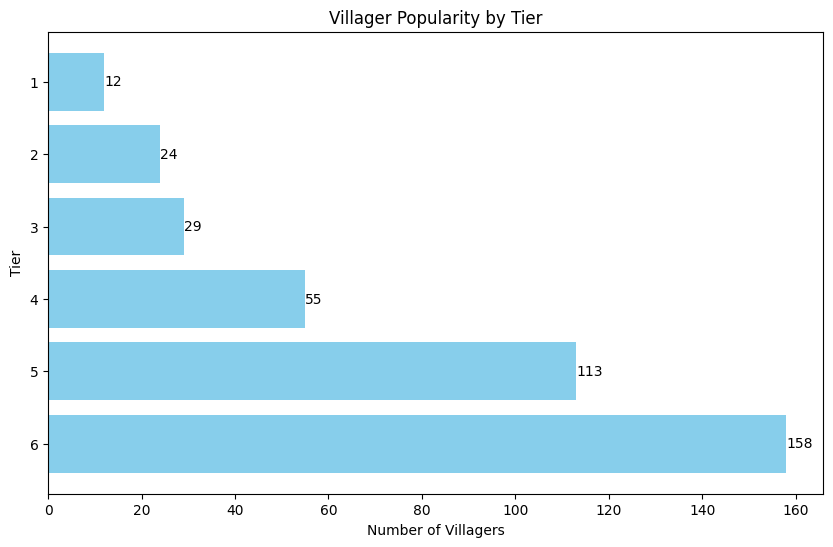

In [63]:
# Count the number of villagers in each tier
tier_counts = final_merged_df['Tier'].value_counts()

# Create a horizontal bar graph
plt.figure(figsize=(10,6))
bars = plt.barh(tier_counts.index, tier_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Number of Villagers')
plt.ylabel('Tier')
plt.title('Villager Popularity by Tier')

# Display the counts on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}', va='center')

# Reverse the y-axis so top tier is at top
plt.gca().invert_yaxis()
    
# Display the plot
plt.show()

The distribution of villagers across tiers shows that the majority of villagers are in the lower tiers (Tiers 5 and 6), while fewer villagers are in the higher tiers (Tiers 1 and 2). The number of villagers increases as the tier number increases. 

## Species

Next, we'll analyze the relationship between species and popularity. To do this, we calculate the average popularity ranking for each species, and then visualize this data using a bar plot. The species are sorted in descending order of popularity, so the species at the top of the plot are the most popular.

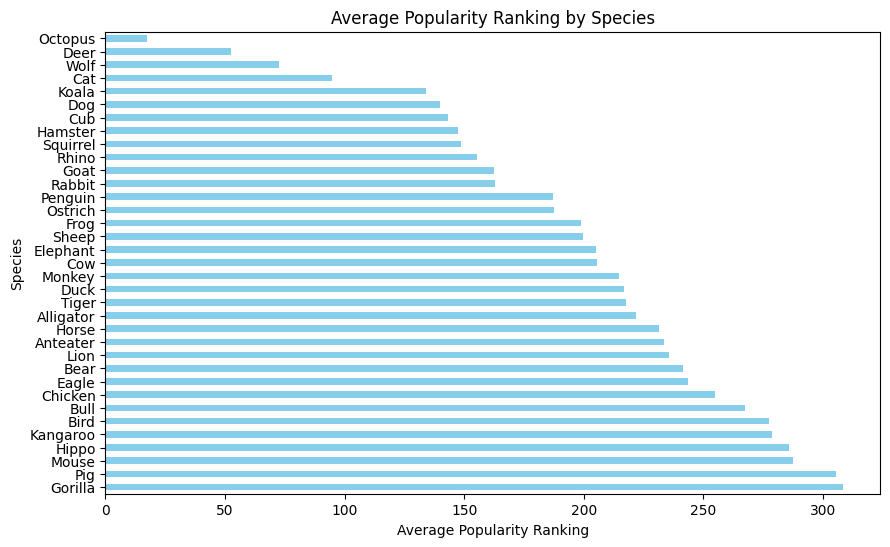

In [64]:
# Calculate the average popularity ranking for each species
species_popularity = final_merged_df.groupby('Species')['Overall_Ranking'].mean().sort_values(ascending=False)

# Plot the average popularity ranking for each species
plt.figure(figsize=(10,6))
species_popularity.plot(kind='barh', color='skyblue')
plt.xlabel('Average Popularity Ranking')
plt.ylabel('Species')
plt.title('Average Popularity Ranking by Species')

plt.show()

The top 5 most popular species are the octopus, deer, wolf, cat, and koala. The 5 least popular are the kangaroo, hippo, mouse, pig, and gorilla.

## Gender

In this section, we'll look at the distribution of genders within each popularity tier to see whether there is a gender bias in the popularity of Animal Crossing villagers. We will create a horizontal bar plot to visualize the number of male and female villagers in each tier.

<Axes: ylabel='Tier,Gender'>

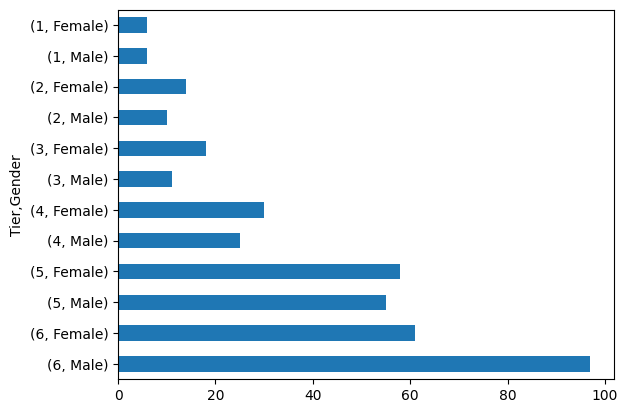

In [65]:
# show gender distribution within each popularity tier
final_merged_df.groupby('Tier').Gender.value_counts().sort_index(ascending=False).plot.barh()

There is a noticeable disproportion in the lowest tier (6th tier), where male villagers significantly outnumber female villagers. If we exclude the 6th tier, the distribution of male and female villagers across the other tiers is relatively balanced, though female villagers have a slight edge over female villagers in tiers 2 through 5.

Next, we'll create a boxplot to visualize the distribution of overall rankings for each gender. The red line represents the overall mean ranking across all villagers. This will help us understand if there are significant differences in the popularity of male and female villagers.

<Axes: xlabel='Gender', ylabel='Overall_Ranking'>

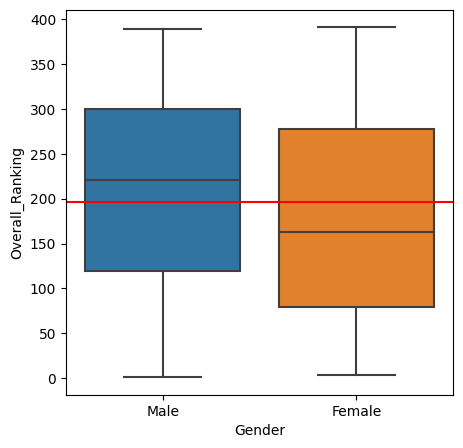

In [66]:
# create a new figure, specify size
plt.figure(figsize=(5, 5))

#draw a horizontal line at the position of the overall mean ranking
plt.axhline(overall_mean, color='r')

# create a boxplot of overall rankings, grouped by gender
sns.boxplot(x="Gender", y='Overall_Ranking', data=final_merged_df)

Female villagers are typically have a higher overall ranking compared to male villagers.

## Personality

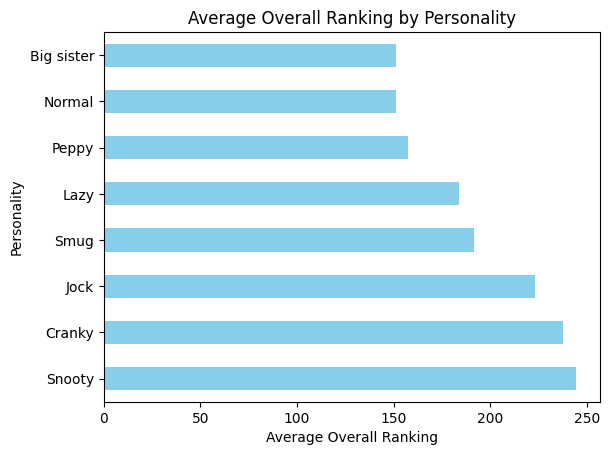

In [67]:
personality_avg_ranking = final_merged_df.groupby('Personality')['Overall_Ranking'].mean().sort_values(ascending=False)
personality_avg_ranking.plot(kind='barh', color='skyblue')
plt.title('Average Overall Ranking by Personality')
plt.xlabel('Average Overall Ranking')
plt.ylabel('Personality')
plt.show()

The playerbase seems to have a preference for villagers with Big Sister, Normal, and Peppy personalities, as indicated by their higher average overall rankings. Conversely, Cranky, Jock, and Snooty villagers tend to have lower average overall rankings, suggesting that they are less favored by the players.

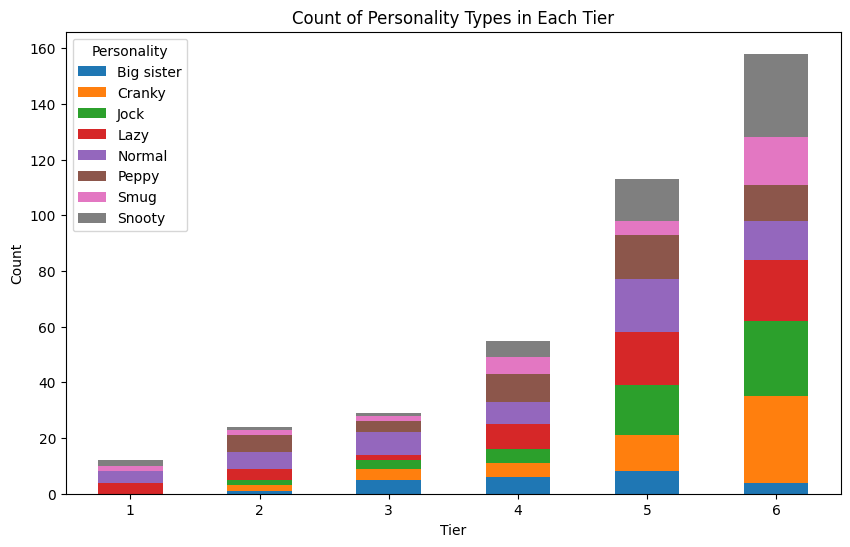

In [68]:
# Create a crosstab of Tier and Personality
personality_tier_crosstab = pd.crosstab(final_merged_df['Tier'], final_merged_df['Personality'])

# Plot a stacked bar chart
personality_tier_crosstab.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Count of Personality Types in Each Tier')
plt.xlabel('Tier')
plt.ylabel('Count')

# Adjust the rotation of x-axis labels
plt.xticks(rotation=0) 

plt.show()

From the chart, we can observe that Lazy and Normal personality types are quite popular across all tiers, with a significant presence in Tiers 1 and 2, which are the top tiers. 

On the other hand, Cranky and Snooty personalities are more prevalent in the lower tiers (5 and 6), suggesting that these personality types might be less popular among players. 'Jock' and 'Smug' personalities also seem to be less favored, as they are more common in the lower tiers.

## Hobbies

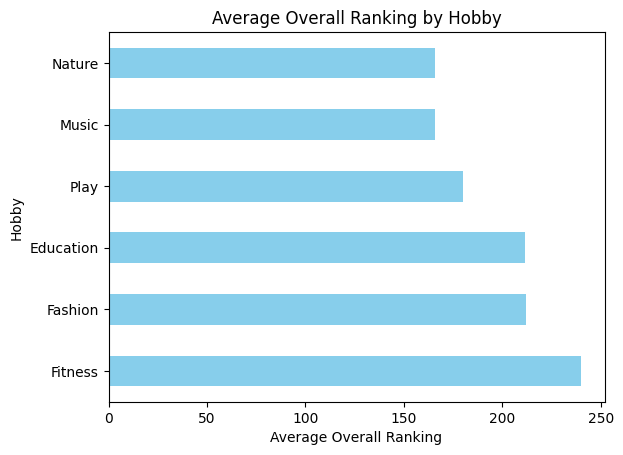

In [69]:
# Calculate average popularity by hobby
hobby_avg_ranking = final_merged_df.groupby('Hobby')['Overall_Ranking'].mean().sort_values(ascending=False)

# Plot a horizontal bar chart
hobby_avg_ranking.plot(kind='barh', color='skyblue')
plt.title('Average Overall Ranking by Hobby')
plt.xlabel('Average Overall Ranking')
plt.ylabel('Hobby')
plt.show()

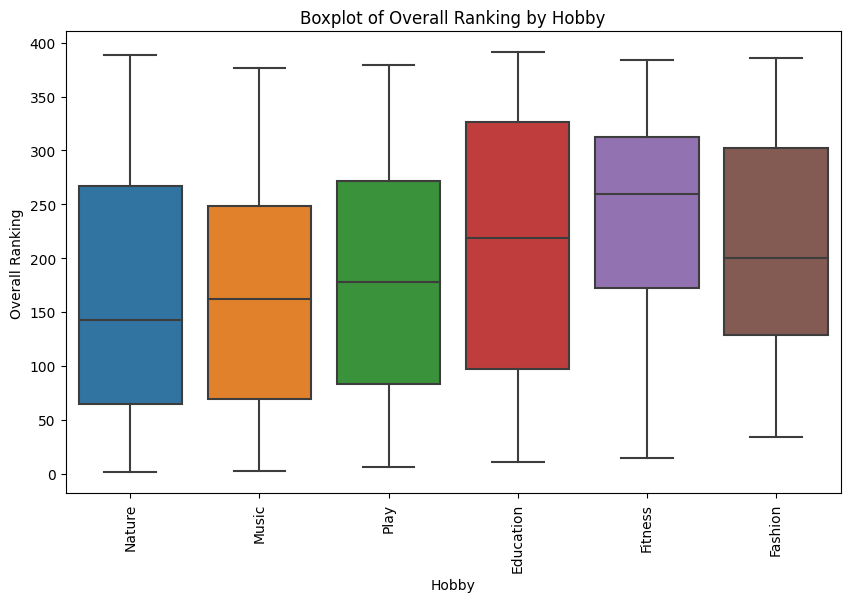

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Hobby", y='Overall_Ranking', data=final_merged_df)
plt.title('Boxplot of Overall Ranking by Hobby')
plt.xlabel('Hobby')
plt.ylabel('Overall Ranking')
plt.xticks(rotation=90)
plt.show()

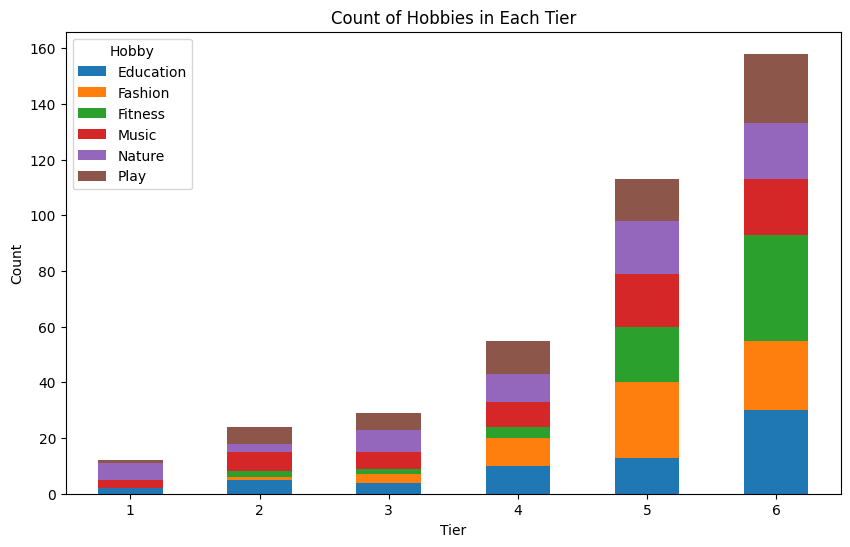

In [71]:
# Create a crosstab of Tier and Hobby
hobby_tier_crosstab = pd.crosstab(final_merged_df['Tier'], final_merged_df['Hobby'])

# Plot a stacked bar chart
hobby_tier_crosstab.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Count of Hobbies in Each Tier')
plt.xlabel('Tier')
plt.ylabel('Count')

# Adjust the rotation of x-axis labels
plt.xticks(rotation=0) 

plt.show()

## Requests

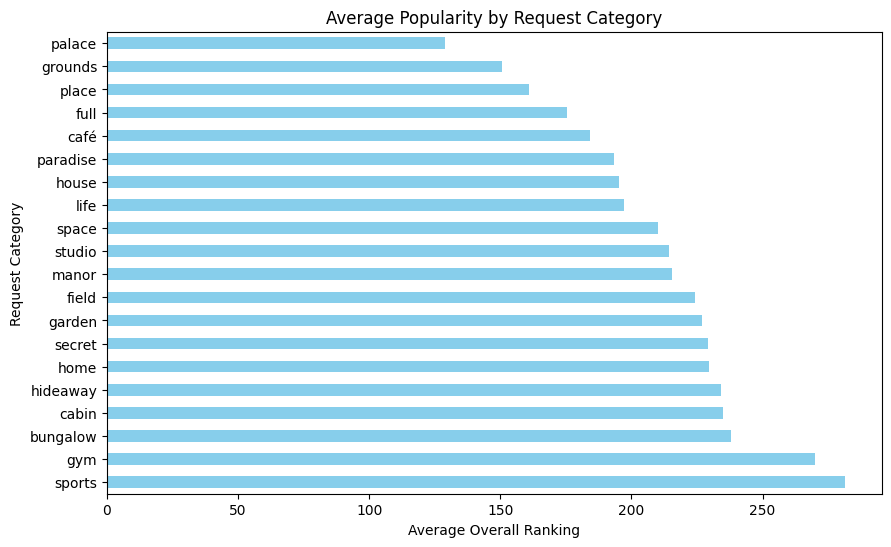

In [72]:
# Convert the dictionary to a pandas Series for easier plotting
category_popularity_series = pd.Series(category_popularity)

# Sort the series
category_popularity_series = category_popularity_series.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10,6))
category_popularity_series.plot(kind='barh', color='skyblue')

# Add labels and title
plt.xlabel('Average Overall Ranking')
plt.ylabel('Request Category')
plt.title('Average Popularity by Request Category')

# Show the plot
plt.show()

The bar graph represents the average popularity ranking of villagers based on the category of their requests. The categories are derived from the most common words found in the villagers' requests.

The category 'palace' has the lowest average popularity ranking, which means villagers who have requests containing the word 'palace' are, on average, the most popular. On the other hand, the category 'sports' has the highest average popularity ranking, indicating that villagers with requests containing the word 'sports' are, on average, the least popular.

It's important to note that these results are based on the assumption that the most common words in the villagers' requests are representative of the content of the requests. 

## Songs

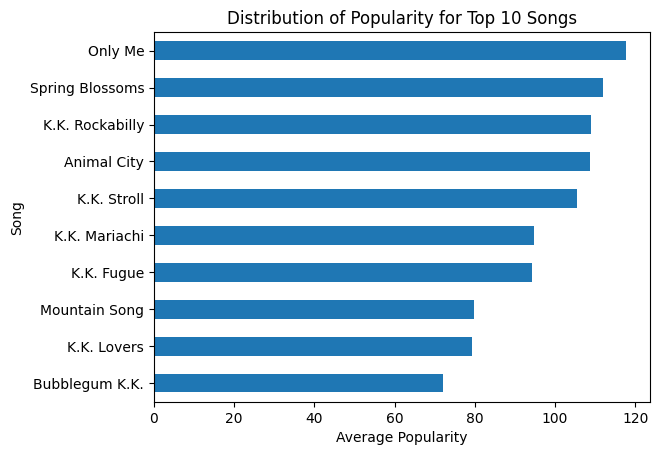

In [73]:
# Select top 10 songs
top_10_songs = song_popularity.sort_values().head(10)

# Plot distribution
top_10_songs.plot(kind='barh')
plt.xlabel('Average Popularity')
plt.title('Distribution of Popularity for Top 10 Songs'.format(10))
plt.show()

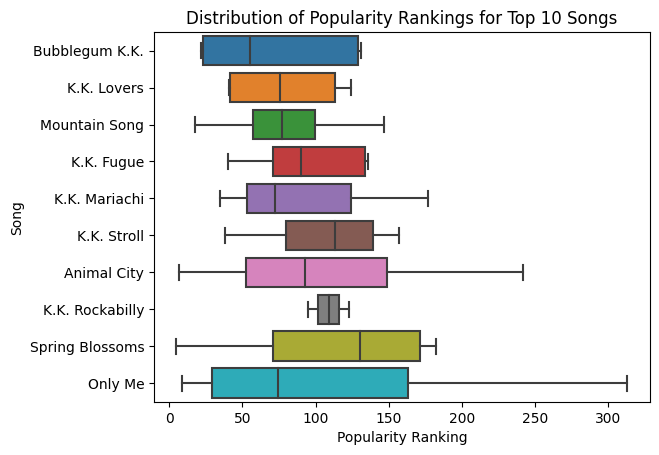

In [74]:
# Select songs in top 10 popularity
top_songs_df = final_merged_df[final_merged_df['Song'].isin(top_10_songs.index)]

# Create boxplot
sns.boxplot(x='Overall_Ranking', y='Song', data=top_songs_df, order=top_10_songs.index)
plt.xlabel('Popularity Ranking')
plt.title('Distribution of Popularity Rankings for Top 10 Songs'.format(10))
plt.show()